In [1]:
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np
import portfolio_methods as portfolio
import match
import pickle


# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models

download_model()
download_predictor()
from dlib_models import models


# take the picture
pic = take_picture()

# first, we load the models that dlib has to detect faces.
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

# detects the face through corners
detections = list(face_detect(pic))
# print(detections)  # list of shape n for n faces

fig, ax = plt.subplots()
ax.imshow(pic)

#database = {}

with open("database.pkl", mode="rb") as opened_file:
    database = pickle.load(opened_file)
    #print("DATABASE")
    #print(database)



print("Number of faces detected: {}".format(len(detections)))
for k, d in enumerate(detections):
    # Get the landmarks/parts for the face in box d.
    shape = shape_predictor(pic, d)
    # Draw the face landmarks on the screen.
    for i in range(68):
        ax.plot(shape.part(i).x, shape.part(i).y, '+', color="blue")

import matplotlib.patches as patches

for faces in detections:
    # Create a Rectangle patch
    rect = patches.Rectangle((faces.left(), faces.bottom()), faces.width(), -faces.height(), linewidth=1, edgecolor='g',
                             facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

names = {}
unknown_counter = database["Unknown Counter"]
for face in detections:
    # let's take a look as to what the descriptor is!!
    shape = shape_predictor(pic, face)
    descriptor = np.array(face_rec_model.compute_face_descriptor(pic, shape))

    # compares descriptor to database through img_in_database
    cutoff = .4
    #print("DATABASE")
    #print(database)
    name = match.img_in_database(descriptor, database, cutoff)

    if name == "not found":
        name = "Unknown" + str(unknown_counter)
        database["Unknown Counter"] += 1

    # plots name underneath square
    ax.text(face.left()+(0.25*faces.width()), face.bottom()+(0.2*faces.height()), name, bbox=dict(facecolor='green', alpha=0.5))

    # adds to names dictionary
    names[name] = descriptor

plt.show()

add_profile = input("Would you like to add this picture to the database? [y/n]  ")
if add_profile == "y":
    for name in names:
    # updates or creates a profile
        if "Unknown" not in name:
            database = portfolio.update_profile(names[name], name, database)
            most_similar=mostsim(names[name],database)
            print(most_similar)
        else:
            add_name = input(f"Would you like to give a name for {name}? [y/n]  ")
            if add_name == "y":
                new_name = input(f"What is {name}'s name?   ")
                if new_name in database:
                    database = portfolio.update_profile(names[name], new_name, database)
                else:
                    database = portfolio.create_profile(names[name], new_name, database)
            else:
                print(f"Saving this person as {name}")
                database = portfolio.create_profile(names[name], name, database)

with open("database.pkl", mode="wb") as opened_file:
    pickle.dump(database, opened_file)


File already exists:
	c:\users\panda\beaverworks\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\panda\beaverworks\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat
Number of faces detected: 1
db[key]
('Emily', array([[ -1.22051008e-01,   1.01379029e-01,   6.27138987e-02,
         -3.72602269e-02,  -3.76451872e-02,  -6.03164732e-02,
         -1.93328243e-02,  -1.35587081e-01,   1.66782409e-01,
         -1.05832912e-01,   2.51412928e-01,  -5.98476268e-02,
         -2.12837309e-01,  -5.08640148e-02,  -7.16959983e-02,
          2.09570080e-01,  -2.08795488e-01,  -1.19112723e-01,
         -3.59339714e-02,   4.14227918e-02,   1.60000339e-01,
         -2.24404316e-03,   4.12444118e-03,   2.20621489e-02,
         -1.13604188e-01,  -2.87895620e-01,  -1.05000675e-01,
         -7.15944692e-02,  -2.62029450e-02,  -3.34887989e-02,
          1.61960125e-02,   8.10663868e-03,  -1.74951345e-01,
         -3.35740000e-02,   1.01079121e-02,   3.

<Figure size 640x480 with 1 Axes>

Would you like to add this picture to the database? [y/n]  


In [2]:
def mostsim(pic, database):
    for key in database:
        diff=9999999
        closest=""
        if diff>pic-database[key][2]:
            diff = pic-database[key][2]
            closest=key
    return closest

In [3]:
from SimpleCV import Image, Camera

cam = Camera()
img = cam.getImage()
img.save("filename.jpg")

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('unit test')? (base.py, line 139)

In [4]:
img.open("filename.jpg")

NameError: name 'img' is not defined

In [5]:
im = Image. open("sample2.png")
np_im = numpy. array(im)
print np_im. shape.
np_im = np_im - 18.
new_im = Image. fromarray(np_im)
new_im. save("numpy_altered_sample2.png")


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(np_im. shape.)? (<ipython-input-5-e5dd03081a23>, line 3)

In [1]:
from camera import take_picture
import matplotlib.pyplot as plt
import numpy as np
#plt.imsave('name.png', img_array)
#img_array.save("img.png")

img_array = take_picture()
np.save('test',img_array)
fig,ax = plt.subplots()
ax.imshow(np.load('test.npy'))
plt.show()


<Figure size 640x480 with 1 Axes>

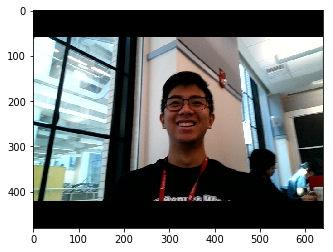

In [7]:
a=plt.imread('name.png')
fig,ax = plt.subplots()
ax.imshow(a)
plt.show()

In [8]:
new_im = Image. fromarray(np_im)
new_im. save("numpy_altered_sample2.png")

NameError: name 'Image' is not defined